# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension,
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.648419e+01     1.288807e+01
 * time: 0.0018129348754882812
     1     3.002906e+01     5.919795e+00
 * time: 0.008089780807495117
     2     2.566360e+01     3.939279e+00
 * time: 0.014501810073852539
     3     2.118440e+01     2.147944e+00
 * time: 0.02081894874572754
     4     2.008635e+01     2.856948e+00
 * time: 0.02738785743713379
     5     1.946164e+01     1.479003e+00
 * time: 0.03380584716796875
     6     1.896526e+01     1.512635e+00
 * time: 0.03869485855102539
     7     1.860577e+01     1.271013e+00
 * time: 0.043771982192993164
     8     1.823013e+01     1.135684e+00
 * time: 0.04885578155517578
     9     1.797098e+01     1.257673e+00
 * time: 0.054268836975097656
    10     1.778955e+01     1.695023e+00
 * time: 0.05802488327026367
    11     1.761530e+01     1.008300e+00
 * time: 0.06293678283691406
    12     1.748944e+01     1.068558e+00
 * time: 0.06804299354553223
    13     1.735281e+01     1.081242e+00
 *

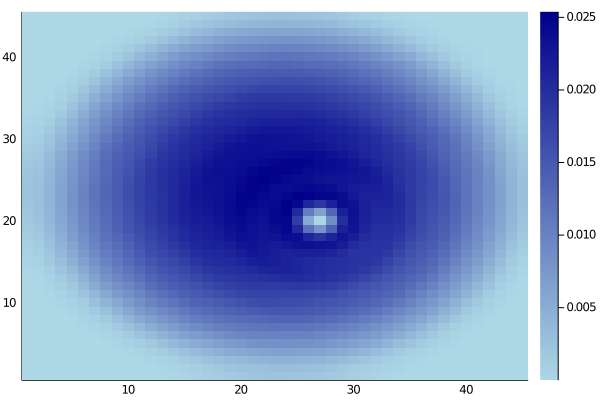

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)